<font size="5">Датасет з продажу житлової нерухомості:</font>

In [734]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

plt.figure(figsize=(14, 8))
warnings.filterwarnings('ignore')
property = pd.read_csv('raw_sales.csv')
ma_quartintervals = pd.read_csv('ma_lga_12345.csv')

<Figure size 1008x576 with 0 Axes>

In [735]:
def regression_score(y, predict):
    print("RMSE:", metrics.mean_squared_error(y, predict, squared=False))
    print("MSE:", metrics.mean_squared_error(y, predict, squared=True))
    print("R2:", metrics.r2_score(y, predict))
    print("MAPE:", metrics.mean_absolute_error(y, predict))

In [736]:
def gridsearchscore(regression):
    print(f'Best score: {regression.best_score_}, Best alpha: {regression.best_params_}')

In [737]:
def truepredplot(y_true, predicted):
    ax = sns.regplot(y=y_true, x=predicted)
    ax.set(xlabel='predicted values', ylabel='true values')
    plt.show()

Property - дані про продажі нерухомості за період 2007-2019 рр. для одного конкретного регіону. Дані містять ціни продажу будинків, кількість спален та інше <br>
ma_quartintervals - property, але з повторно відібрані на поквартальні інтервали з використанням медіанного агрегатора <br>
Використовувати будемо raw data (property):

In [738]:
property.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [739]:
ma_quartintervals['saledate'] = pd.to_datetime(ma_quartintervals['saledate'])
ma_quartintervals.head()


,saledate,MA,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
2,2008-03-31,441854,house,2
3,2008-06-30,441854,house,2
4,2008-09-30,451583,house,2


<AxesSubplot:xlabel='propertyType', ylabel='Count'>

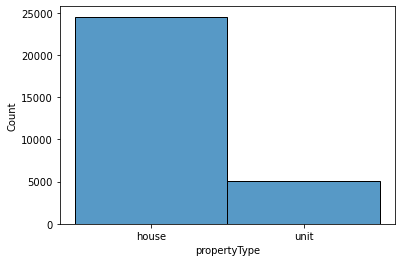

In [740]:
sns.histplot(data=property['propertyType'])

In [741]:
property['datesold'] = pd.to_datetime(property['datesold'])
property['month'] = property['datesold'].dt.month
property['year'] = property['datesold'].dt.year
property['propertyType'].replace(['house','unit'],[1, 0],inplace=True)
property.head()

,datesold,postcode,price,propertyType,bedrooms,month,year
0,2007-02-07,2607,525000,1,4,2,2007
1,2007-02-27,2906,290000,1,3,2,2007
2,2007-03-07,2905,328000,1,3,3,2007
3,2007-03-09,2905,380000,1,4,3,2007
4,2007-03-21,2906,310000,1,3,3,2007


Видаляємо поштовий індекс тому що він не допоможе нам у подальшому

In [742]:
property.drop('postcode', axis=1, inplace=True)

In [743]:
property.describe().applymap('{0:.5f}'.format)

,price,propertyType,bedrooms,month,year
count,29580.00000,29580.00000,29580.00000,29580.00000,29580.00000
mean,609736.26220,0.83002,3.25017,6.71427,2014.62532
std,281707.90537,0.37562,0.95127,3.37964,2.96434
min,56500.00000,0.00000,0.00000,1.00000,2007.00000
25%,440000.00000,1.00000,3.00000,4.00000,2013.00000
50%,550000.00000,1.00000,3.00000,7.00000,2015.00000
75%,705000.00000,1.00000,4.00000,10.00000,2017.00000
max,8000000.00000,1.00000,5.00000,12.00000,2019.00000


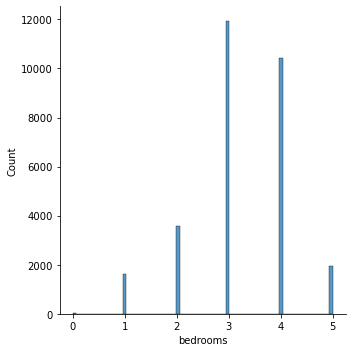

In [744]:
sns.displot(data=property['bedrooms'])

<AxesSubplot:xlabel='datesold', ylabel='price'>

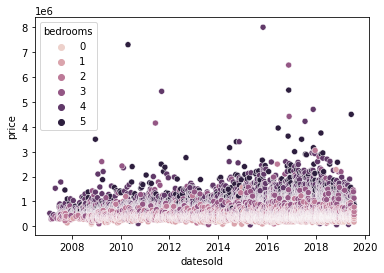

In [745]:
sns.scatterplot(data=property, x='datesold', y='price', hue='bedrooms')

In [746]:
property.drop('datesold', axis=1, inplace=True)

<AxesSubplot:>

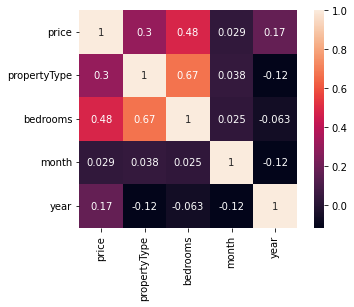

In [747]:
corr = property.corr()

sns.heatmap(corr, square=True, annot=True)

Цільова змінна (ціна) корелює з типом нерухомості, та кількістю спален, сильного зв'язку з місяцем та роком немає 

<AxesSubplot:xlabel='saledate', ylabel='MA'>

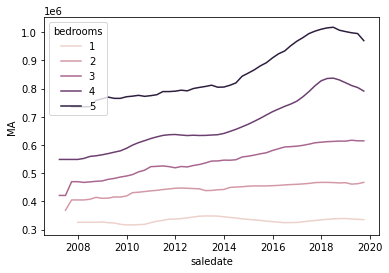

In [748]:
sns.lineplot(data=ma_quartintervals, x='saledate', y='MA', hue='bedrooms', ci=None)

<font size="5">Створимо модель (лінійна регресія):</font>


In [749]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = property['price']
X = property.drop(['price'], axis='columns')

In [750]:
y.head()

0    525000
1    290000
2    328000
3    380000
4    310000
Name: price, dtype: int64

In [751]:
X.head()

,propertyType,bedrooms,month,year
0,1,4,2,2007
1,1,3,2,2007
2,1,3,3,2007
3,1,4,3,2007
4,1,3,3,2007


In [752]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=17)

In [753]:
linreg_fit_true = LinearRegression(fit_intercept=True)
linreg_fit_true.fit(X_train, y_train)

LinearRegression()

In [754]:
predict_true = linreg_fit_true.predict(X_test)

print("Test data")
regression_score(y_test, predict_true)

Test data
RMSE: 246142.92456744486
MSE: 60586339314.614845
R2: 0.27055629779047397
MAPE: 147760.66816010646


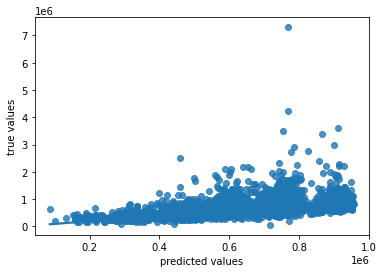

In [755]:
truepredplot(y_test, predict_true)

In [756]:
predict_true = linreg_fit_true.predict(X_train)

print("Train data")
regression_score(y_train, predict_true)

Train data
RMSE: 237715.84332574887
MSE: 56508822168.071976
R2: 0.279510706512492
MAPE: 144952.04541811757


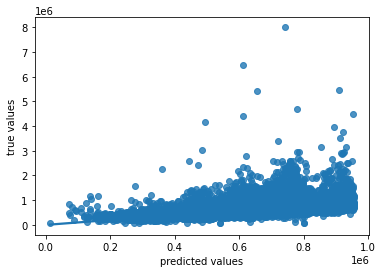

In [757]:
truepredplot(y_train, predict_true)

In [758]:
pd.DataFrame(linreg_fit_true.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
bedrooms,149519.240667
year,19934.912154
month,3351.723326
propertyType,-12661.330718


In [759]:
linreg_fit_false = LinearRegression(fit_intercept=False)
linreg_fit_false.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [760]:
predict_false = linreg_fit_false.predict(X_test)

print("Test data")
regression_score(y_test, predict_false)

Test data
RMSE: 252175.38053070617
MSE: 63592422545.80646
R2: 0.2343638407759694
MAPE: 153648.70472091407


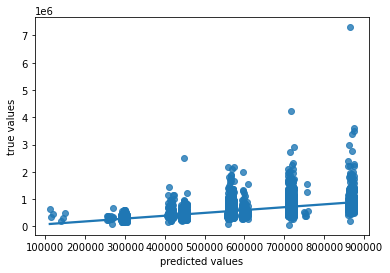

In [761]:
truepredplot(y_test, predict_false)

In [762]:
predict_false = linreg_fit_false.predict(X_train)

print("Train data")
regression_score(y_train, predict_false)

Train data
RMSE: 244672.25423236607
MSE: 59864511991.147575
R2: 0.2367255537340467
MAPE: 150765.71292351803


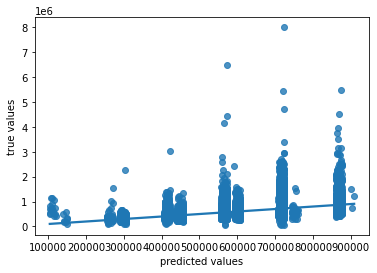

In [763]:
truepredplot(y_train, predict_false)

In [764]:
pd.DataFrame(linreg_fit_false.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
bedrooms,151063.262494
month,1378.260460
year,68.502214
propertyType,-34742.801716


1. Великої різниці між моделями немає, хоча fit_intercept=True трохи точніше
2. Перенавчання немає, R^2 має близькі значення для навчальної та тестової вибірки 
3. Найбільший коефіцієнт має 'bedrooms', цікаво, що хоч і великої різниці між ними немає, але коефіцієнти досить різні для місяця та року, у fit_intercept=False саме місяць має більший коефіцієнт, на відміну від року у fit_intercept=True

<font size="5">Тепер спробуємо Rigde regression з різними параметрами alpha:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [765]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
parameters = {'alpha': [0.1, 1, 2, 5]}

rigde_reg_gridsearch = GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error', cv=5)

In [766]:
rigde_reg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error')

In [767]:
gridsearchscore(rigde_reg_gridsearch)

Best score: -56541505912.6368, Best alpha: {'alpha': 5}


In [768]:
rigde_reg_gridsearch.cv_results_

{'mean_fit_time': array([0.00319886, 0.        , 0.00160313, 0.00160284]),
 'std_fit_time': array([0.00391779, 0.        , 0.00320625, 0.00320568]),
 'mean_score_time': array([0.00159917, 0.00160265, 0.00159869, 0.0015975 ]),
 'std_score_time': array([0.00319834, 0.0032053 , 0.00319738, 0.003195  ]),
 'param_alpha': masked_array(data=[0.1, 1, 2, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1}, {'alpha': 1}, {'alpha': 2}, {'alpha': 5}],
 'split0_test_score': array([-5.90133360e+10, -5.90133118e+10, -5.90132852e+10, -5.90132074e+10]),
 'split1_test_score': array([-5.41267953e+10, -5.41266642e+10, -5.41265191e+10, -5.41260873e+10]),
 'split2_test_score': array([-5.81102573e+10, -5.81104182e+10, -5.81105973e+10, -5.81111359e+10]),
 'split3_test_score': array([-6.02428915e+10, -6.02429148e+10, -6.02429409e+10, -6.02430212e+10]),
 'split4_test_score': array([-5.12143358e+10, -5.12142880e+10, -5.12142351e+10, 

In [769]:
predict_ridge = rigde_reg_gridsearch.predict(X_test)

regression_score(y_test, predict_ridge)

RMSE: 246143.87211231483
MSE: 60586805778.4436
R2: 0.2705506816878005
MAPE: 147759.78206201887


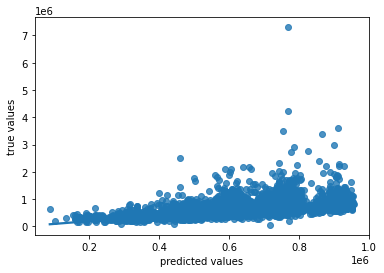

In [770]:
truepredplot(y_test, predict_ridge)

In [771]:
predict_ridge = rigde_reg_gridsearch.predict(X_train)

regression_score(y_train, predict_ridge)

RMSE: 237715.84894801796
MSE: 56508824841.07689
R2: 0.27951067243159367
MAPE: 144951.47646149108


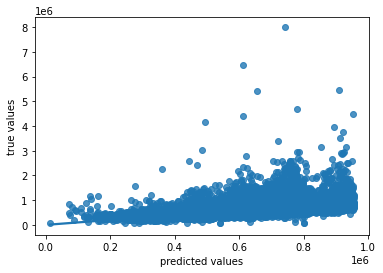

In [772]:
truepredplot(y_train, predict_ridge)

In [773]:
pd.DataFrame(rigde_reg_gridsearch.best_estimator_.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
bedrooms,149446.550804
year,19935.101610
month,3351.669092
propertyType,-12518.248143


1. Найкраще значення alpha = 5
2. Великої різниці між Linear та Ridge Regression немає 
3. Перенавчання також немає
4. Коефіцієнти дуже схожі на Linreg з fit_intercept=True

<font size="5">Тепер спробуємо Lasso regression з різними параметрами alpha:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [774]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
parameters = {'alpha': [0.1, 1, 2, 5]}

lasso_reg_gridsearch = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=5)

In [775]:
lasso_reg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error')

In [776]:
gridsearchscore(lasso_reg_gridsearch)

Best score: -56541522363.747116, Best alpha: {'alpha': 5}


In [777]:
lasso_reg_gridsearch.cv_results_

{'mean_fit_time': array([0.00639725, 0.00640073, 0.00320029, 0.00480056]),
 'std_fit_time': array([0.00319863, 0.00320036, 0.00391954, 0.00391964]),
 'mean_score_time': array([0.        , 0.        , 0.00160031, 0.00159998]),
 'std_score_time': array([0.        , 0.        , 0.00320063, 0.00319996]),
 'param_alpha': masked_array(data=[0.1, 1, 2, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1}, {'alpha': 1}, {'alpha': 2}, {'alpha': 5}],
 'split0_test_score': array([-5.90133380e+10, -5.90133315e+10, -5.90133242e+10, -5.90133028e+10]),
 'split1_test_score': array([-5.41268043e+10, -5.41267533e+10, -5.41266967e+10, -5.41265274e+10]),
 'split2_test_score': array([-5.81102433e+10, -5.81102784e+10, -5.81103175e+10, -5.81104350e+10]),
 'split3_test_score': array([-6.02428894e+10, -6.02428936e+10, -6.02428983e+10, -6.02429126e+10]),
 'split4_test_score': array([-5.12143430e+10, -5.12143596e+10, -5.12143782e+10, 

In [778]:
predict_lasso = lasso_reg_gridsearch.predict(X_test)

regression_score(y_test, predict_lasso)

RMSE: 246143.2505548481
MSE: 60586499793.70674
R2: 0.2705543656641194
MAPE: 147761.2035398721


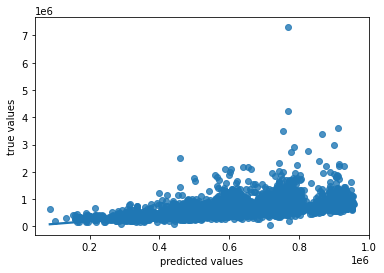

In [779]:
truepredplot(y_test, predict_lasso)

In [780]:
predict_lasso = lasso_reg_gridsearch.predict(X_train)

regression_score(y_train, predict_lasso)

RMSE: 237715.84450512452
MSE: 56508822728.784546
R2: 0.2795106993633888
MAPE: 144952.7187665138


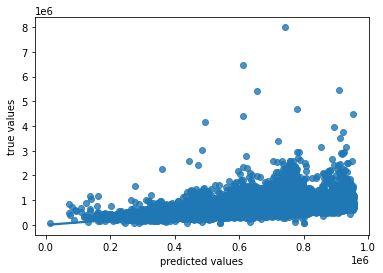

In [781]:
truepredplot(y_train, predict_lasso)

In [782]:
pd.DataFrame(lasso_reg_gridsearch.best_estimator_.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
bedrooms,149491.739373
year,19934.986418
month,3351.169181
propertyType,-12578.318655


1. Найкращий параметр alpha = 5
2. Результати схожі з попередніми
3. Перенавчання немає
4. Коефіцієнти також майже однакові з попердніми моделями

<font size="5">Тепер спробуємо Elastic regression з різними параметрами alpha, l1_ratio:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [783]:
from sklearn.linear_model import ElasticNet

EN_reg = ElasticNet(max_iter=10000)
parameters = {'alpha': [0.1, 1, 2, 5],
              'l1_ratio': [0, 0.2, 0.5, 0.8, 1]}

EN_reg_gridsearch = GridSearchCV(EN_reg, parameters, scoring='neg_mean_squared_error', cv=5)

In [784]:
EN_reg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.1, 1, 2, 5],
                         'l1_ratio': [0, 0.2, 0.5, 0.8, 1]},
             scoring='neg_mean_squared_error')

In [785]:
gridsearchscore(EN_reg_gridsearch)

Best score: -56541522363.747116, Best alpha: {'alpha': 5, 'l1_ratio': 1}


In [786]:
EN_reg_gridsearch.cv_results_

{'mean_fit_time': array([0.79075522, 0.00160003, 0.00320039, 0.00320039, 0.00480065,
        0.67877007, 0.00320063, 0.0032002 , 0.00640149, 0.00480051,
        0.61479511, 0.00159998, 0.00320067, 0.00320029, 0.00480056,
        0.69652014, 0.00640111, 0.00480037, 0.00480042, 0.00320048]),
 'std_fit_time': array([0.13327922, 0.00320005, 0.00391966, 0.00391966, 0.00391972,
        0.12757137, 0.00391995, 0.00391943, 0.00320075, 0.0039196 ,
        0.02610238, 0.00319996, 0.00392001, 0.00391954, 0.00391964,
        0.09793576, 0.00320056, 0.00391948, 0.00391952, 0.00391978]),
 'mean_score_time': array([0.        , 0.0032002 , 0.00160036, 0.        , 0.        ,
        0.00319986, 0.00160027, 0.00159998, 0.        , 0.00159979,
        0.00160041, 0.00320024, 0.        , 0.00160022, 0.        ,
        0.00320063, 0.        , 0.        , 0.        , 0.00160036]),
 'std_score_time': array([0.        , 0.00391943, 0.00320072, 0.        , 0.        ,
        0.00391902, 0.00320053, 0.003199

In [787]:
predict_EN = EN_reg_gridsearch.predict(X_test)

regression_score(y_test, predict_EN)

RMSE: 246143.2505548481
MSE: 60586499793.70674
R2: 0.2705543656641194
MAPE: 147761.2035398721


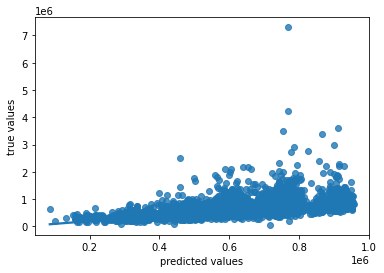

In [788]:
truepredplot(y_test, predict_EN)

In [789]:
predict_EN = EN_reg_gridsearch.predict(X_train)

regression_score(y_train, predict_EN)

RMSE: 237715.84450512452
MSE: 56508822728.784546
R2: 0.2795106993633888
MAPE: 144952.7187665138


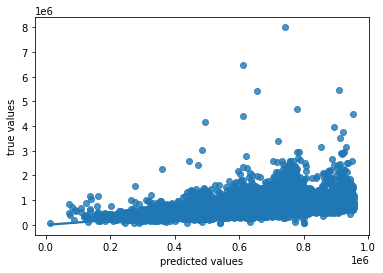

In [790]:
truepredplot(y_train, predict_EN)

In [791]:
pd.DataFrame(EN_reg_gridsearch.best_estimator_.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
bedrooms,149491.739373
year,19934.986418
month,3351.169181
propertyType,-12578.318655


1. Найкращий параметр alpha = 5, l1_ratio = 1, модель виявила, що дорівнює похибці l2_ratio, тобто похибкою для Lasso
2. Результати ідентичні з Lasso
3. Перенавчання немає
4. Коефіцієнти ідентичні з Lasso

Моделям було складно себе реалізувати через невелику кількість ознак які б корелювали з цільовою ознакою, через це вони не зрозуміли як прогнозувати високі ціни (а саме це і дало велику середньоквадратичну похибку), можно було б сказати, що це артефакти, але їх кількість завелика. 
На мою думку саме через це ми і отримали досить погані результати.

<font size=5>Висновок:</font> <br>
У даній лабораторній роботі я навчився будувати та оцiнювати якостi моделей дерев рiшень та опорних векторiв для класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn Python